<div>
    <h1> Анализ оттока клиентов <a class="tocSkip"> </h1>


<div>
    <h3> Описание работы: <a class="tocSkip"> </h3>

Проблема:

    - В банке последнее время сильно повысился отток клиентов, проблема угрожает существованию банка
    
Цели: 
        
    - Выявить сегменты отточных клиентов, чтобы они были однородными, точными и покрывали максимум проблемных зон банка. 
        
    - Дать рекомендации отделу маркетинга по отточным и приоритетным сегментам.

<div>
    <h3> 1. Предобработка данных <a class="tocSkip"> </h3>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import median
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
try:
    data = pd.read_csv('/datasets/bank_scrooge.csv')  
    
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')


In [3]:
data

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


In [4]:
#корректировка названий столбцов
data.columns = map(str.lower, data.columns)
data = data.rename(columns={'userid':'user_id'})
data

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [6]:
#Посмотрим % пропусков в данных
for col in data.columns:
    print(f'{col}: {data[col].isna().sum() / data.shape[0] * 100:.2f}%')

user_id: 0.00%
score: 0.00%
city: 0.00%
gender: 0.00%
age: 0.26%
equity: 0.00%
balance: 22.95%
products: 0.00%
credit_card: 0.00%
last_activity: 0.00%
est_salary: 0.00%
churn: 0.00%


У нас есть небольшое количество пропусков в данных о возрасте клиентов. Можно было бы заполнить их медианным значением по признакам, однако на 26 строк в этом нет смысла. Поэтому я просто удалю их из датафрейма. 

In [7]:
data = data.dropna(subset=['age'], axis=0)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   float64
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   float64
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1013.0+ KB


In [9]:
#Изменим типы данных в колонках
data['user_id'] = data['user_id'].astype(object)
data['score'] = data['score'].astype(int)
data['age'] = data['age'].astype(int)

/tmp/ipykernel_232/3154361184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['user_id'] = data['user_id'].astype(object)
/tmp/ipykernel_232/3154361184.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['score'] = data['score'].astype(int)
/tmp/ipykernel_232/3154361184.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   object 
 1   score          9974 non-null   int64  
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   int64  
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1013.0+ KB


In [11]:
#проверка наличия пропусков
data.isna().sum()

user_id             0
score               0
city                0
gender              0
age                 0
equity              0
balance          2279
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

In [12]:
data.describe()

,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,9974.000000,9974.000000,9974.000000,7.695000e+03,9974.000000,9974.000000,9974.000000,9.974000e+03,9974.000000
mean,848.682575,42.734409,2.630840,8.272456e+05,1.871466,0.680168,0.522859,1.477868e+05,0.182374
std,65.399720,12.179971,1.979965,1.980327e+06,0.792729,0.466435,0.499502,1.392855e+05,0.386172
min,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,802.000000,33.000000,0.000000,2.956987e+05,1.000000,0.000000,0.000000,7.525166e+04,0.000000
50%,853.000000,40.000000,3.000000,5.242953e+05,2.000000,1.000000,1.000000,1.196268e+05,0.000000
75%,900.000000,51.000000,4.000000,9.800512e+05,2.000000,1.000000,1.000000,1.744998e+05,0.000000
max,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


В products не должно быть 0

In [13]:
data[data['products']==0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962,Рыбинск,Ж,79,3,NaN,0,0,0,25063.96,1


Возможно, появление 0 в столбце products связано с ошибкой в системе. т.к нам известно что если клиент уходит из банка, то его id удаляется, и при отсутствии продуктов клиента не должно было быть в списке. Я думаю эту строку можно удалить из данных.

In [14]:
data = data.drop(labels=[8957], axis = 0)

In [15]:
#проверка наличия дубликатов
data.duplicated().sum()

0

In [16]:
#проверим наличие дубликатов по столбцу user_id
#pd.set_option('display.max_rows', None)
data[data.duplicated(['user_id'], keep=False)].sort_values(by='user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883,Рыбинск,Ж,55,1,362756.49,3,0,1,175920.48,1
7694,116540,887,Ярославль,Ж,38,0,NaN,1,0,1,119247.61,0
4866,117943,855,Рыбинск,Ж,32,6,1036832.93,4,1,1,107792.71,1
7542,117943,880,Ярославль,Ж,40,0,NaN,1,1,0,137718.93,0
5863,120258,908,Рыбинск,Ж,38,4,2213581.63,2,0,1,160327.77,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2302,220816,934,Рыбинск,Ж,74,5,1294285.39,3,1,0,95606.80,0
2597,226719,990,Ярославль,М,37,4,14648692.14,2,0,0,934412.61,1
4216,226719,903,Рыбинск,Ж,63,0,NaN,1,1,0,138582.58,0
8205,227795,840,Рыбинск,М,34,2,350768.03,1,1,0,102036.14,1


Дубликаты по user_id выявлены в городах Рыбинск и Ярославль. В то же время остальные данные не дублируются. Пока что массово удалять дубликаты не буду. нужно разобраться какое количество отточных клиентов среди дубликатов и пропусков.

In [17]:
#Поищем неявные дубликаты
data[data.duplicated(['user_id', 'gender', 'products', 'credit_card', 'est_salary'], keep=False)].sort_values(by='user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


неявных дубликатов не нашлось. Скорее всего проблема в присвоении ID пользователям. Так как информация доблируется только в user_id, а мы не исследуем каждого пользователя персонально по id, то я не буду удалять эти строки 

In [18]:
df_1 = data[data['balance'].isnull()]
df_1.head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
9,133130,906,Ярославль,Ж,67,0,NaN,1,0,1,238055.53,0
10,148929,927,Ростов,М,52,0,NaN,1,1,1,196820.07,0
11,172184,921,Ростов,М,41,0,NaN,1,1,1,217469.48,0
19,127034,922,Рыбинск,Ж,53,0,NaN,1,0,0,147094.82,0
21,177415,896,Рыбинск,Ж,47,0,NaN,1,0,0,225060.35,0
30,155730,946,Ярославль,Ж,47,0,NaN,2,1,1,660015.85,0
34,205226,944,Ярославль,М,35,0,NaN,2,1,1,239843.39,0
39,173175,924,Рыбинск,Ж,51,0,NaN,1,1,1,248844.47,0
43,228585,956,Ростов,М,41,0,NaN,1,1,0,115117.10,0


In [19]:
df_1['churn'].value_counts(normalize=True)

0    0.994732
1    0.005268
Name: churn, dtype: float64

99.4% строк с пропусками в столбце balance относятся к пользователям, которые не являются отточными. Глобально, отсутствие этих сведений не повлияет на основную цель исследования. Таким образом не вижу смысла заполнять эти данные 

In [20]:
#кодирование столбца balance с пропусками
data['missing_value'] = data['balance'].apply(lambda x: 1 if pd.isna(x) else 0).astype(int)
data.head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,missing_value
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,1
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0
5,202305,856,Рыбинск,М,56,4,863687.24,3,1,0,156619.80,0,0
6,177259,807,Ярославль,Ж,39,3,405042.44,3,0,1,103838.32,0,0
7,218868,825,Ярославль,Ж,38,4,458145.40,2,1,1,68085.48,0,0
8,211686,923,Ярославль,М,54,5,1206337.87,2,1,0,155371.79,0,0
9,133130,906,Ярославль,Ж,67,0,NaN,1,0,1,238055.53,0,1


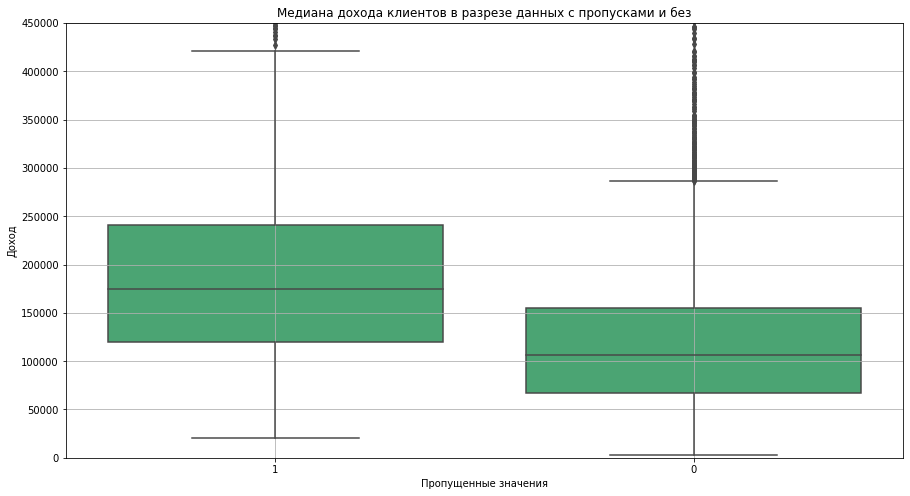

In [21]:
data_1 = data.query('missing_value == 1') #данные с пропусками
data_2 = data.query('missing_value == 0') #данные без пропусков
data_medians = data.groupby('missing_value')['est_salary'].median().sort_values(ascending=False)
# Построение графика с учетом сортировки по медиане
plt.figure(figsize=(15, 8))
ax = sns.boxplot(x='missing_value', y='est_salary', data=data, color='#3CB371', order=data_medians.index)
plt.title('Медиана дохода клиентов в разрезе данных с пропусками и без')
plt.xlabel('Пропущенные значения')
plt.ylabel('Доход')
plt.ylim(0, 450000)
plt.grid(True)
plt.show()
plt.show()

In [22]:
data_1.describe()

,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,missing_value
count,2278.000000,2278.000000,2278.000000,0.0,2278.000000,2278.000000,2278.000000,2.278000e+03,2278.000000,2278.0
mean,865.314750,42.076822,0.050044,NaN,1.163740,0.815628,0.549166,2.264338e+05,0.005268,1.0
std,89.550489,11.919094,0.218083,NaN,0.403065,0.387873,0.497686,1.998249e+05,0.072404,0.0
min,642.000000,18.000000,0.000000,NaN,1.000000,0.000000,0.000000,2.027403e+04,0.000000,1.0
25%,871.000000,33.000000,0.000000,NaN,1.000000,1.000000,0.000000,1.202695e+05,0.000000,1.0
50%,903.000000,40.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.743542e+05,0.000000,1.0
75%,922.000000,49.000000,0.000000,NaN,1.000000,1.000000,1.000000,2.403970e+05,0.000000,1.0
max,990.000000,86.000000,1.000000,NaN,3.000000,1.000000,1.000000,1.333687e+06,1.000000,1.0


In [23]:
data_2.describe()

,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,missing_value
count,7695.000000,7695.000000,7695.000000,7.695000e+03,7695.000000,7695.000000,7695.000000,7.695000e+03,7695.000000,7695.0
mean,843.744120,42.924366,3.394802,8.272456e+05,2.081222,0.640156,0.515140,1.245204e+05,0.234698,0.0
std,55.342539,12.244010,1.584817,1.980327e+06,0.757446,0.479986,0.499803,1.046671e+05,0.423837,0.0
min,689.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,2.546300e+03,0.000000,0.0
25%,801.000000,33.000000,2.000000,2.956987e+05,2.000000,0.000000,0.000000,6.755698e+04,0.000000,0.0
50%,840.000000,40.000000,4.000000,5.242953e+05,2.000000,1.000000,1.000000,1.062502e+05,0.000000,0.0
75%,882.000000,52.000000,5.000000,9.800512e+05,2.000000,1.000000,1.000000,1.551446e+05,0.000000,0.0
max,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000,0.0


проведя дополнительное исследование выяснила, что медиана дохода в данных с пропусками составляет около 180 тыс рублей и доход этих клиентов в диапазоне от 120 до 245 тыс рублей. Там же, где пропусков нет медиана находится в районе 110 тыс рублей, а диапазон дохода от 65 до 155 тыс.
Так же судя по описанию двух таблиц значительных отклонений в средней нет, кроме разницы по количеству продуктов. 
Таким образом, решение оставить пропуски и не заполнять их остается в силе.

In [24]:
#кодирование столбцов city 
data['city_1'] = data['city']
data = pd.get_dummies(data, columns = ['city_1']).rename(columns=({'city_1_Ростов': 'Ростов',
                                                                              'city_1_Рыбинск': 'Рыбинск',
                                                                              'city_1_Ярославль': 'Ярославль'}))

In [25]:
#кодирование столбца gender 
data['gender_c'] = data['gender'].apply(lambda x: 0 if x == 'Ж' else 1)
data.head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,missing_value,Ростов,Рыбинск,Ярославль,gender_c
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0,0,1,0,0
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0,0,1,0,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,1,0,1,0,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,0,0,1,0
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,0,0,1,1
5,202305,856,Рыбинск,М,56,4,863687.24,3,1,0,156619.80,0,0,0,1,0,1
6,177259,807,Ярославль,Ж,39,3,405042.44,3,0,1,103838.32,0,0,0,0,1,0
7,218868,825,Ярославль,Ж,38,4,458145.40,2,1,1,68085.48,0,0,0,0,1,0
8,211686,923,Ярославль,М,54,5,1206337.87,2,1,0,155371.79,0,0,0,0,1,1
9,133130,906,Ярославль,Ж,67,0,NaN,1,0,1,238055.53,0,1,0,0,1,0


В части предобработки данных были осуществлены следующие действия:
- корректировка названий столбцов в соответствии с принятыми стандартами
- удаление 0,27% пропусков
- изменены типы данных в столбцах user_id(obj), score(int), age(int)
- исследование явных/неявных дубликатов
- кодирование столбцов gender, city для удобства дальнейшего исследования
- изучение влияния пропусков в столбце  balance на другие данные


<div>
    <h3> 2. Исследовательский анализ данных <a class="tocSkip"> </h3>

In [26]:
#создадим переменную со средней оттока по банку
mean_churn = data['churn'].mean() * 100

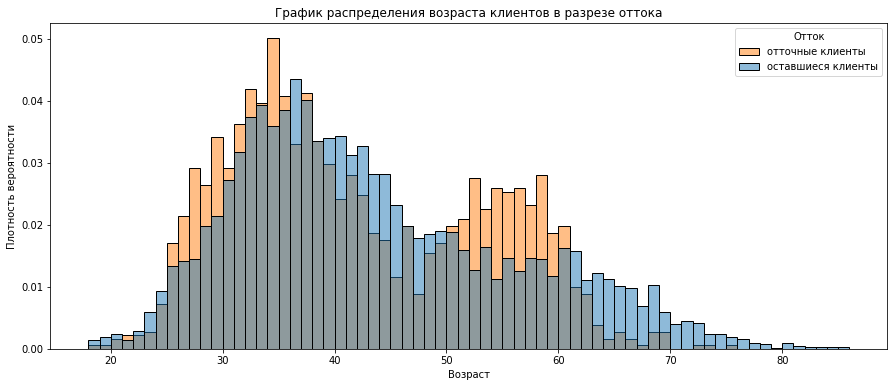

In [27]:
plt.figure(figsize=(15, 6))
sns.histplot(data=data, x='age', hue='churn', fill=True, stat='density', common_norm=False, bins=68)

plt.title('График распределения возраста клиентов в разрезе оттока')
plt.xlabel('Возраст')
plt.ylabel('Плотность вероятности')
plt.legend(title='Отток', labels=['отточные клиенты', 'оставшиеся клиенты'])
plt.show()

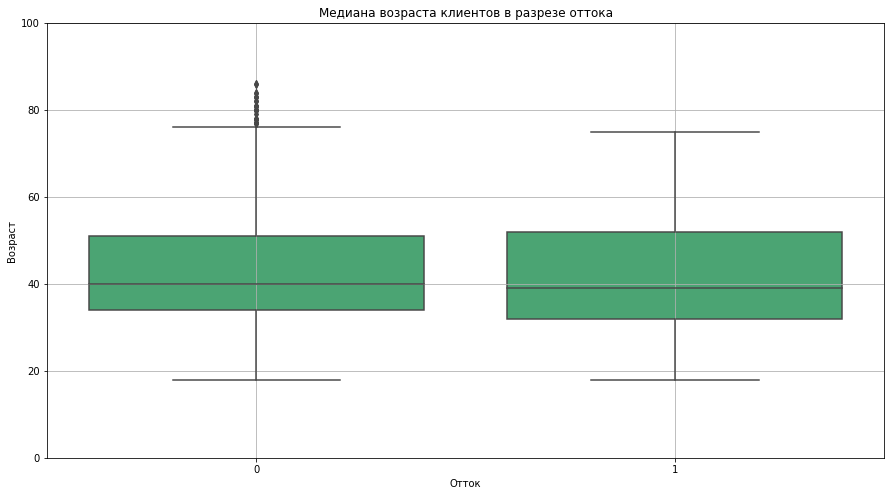

In [28]:
# Создание сводной таблицы с медианами
age_medians = data.groupby('churn')['age'].median().sort_values(ascending=False)

# Построение графика с учетом сортировки по медиане
plt.figure(figsize=(15, 8))
ax = sns.boxplot(x='churn', y='age', data=data, color='#3CB371', order=age_medians.index)
plt.title('Медиана возраста клиентов в разрезе оттока')
plt.xlabel('Отток')
plt.ylabel('Возраст')
plt.ylim(0, 100)
plt.grid(True)
plt.show()

Медиана возраста оттока в районе 39 лет.
Отточный промежуток: от 34 до 55 лет

Отточных клиентов я бы поделила на 3 возрастные группы: 24-37 (здесь уровень оттока выше чем количество остающихся у банка клиентов, и идет на повышение), 38-46 (количество отточных клиентов меньше чем оставшихся и график идет на понижение) лет и 47-62 (очередной всплеск оттока)

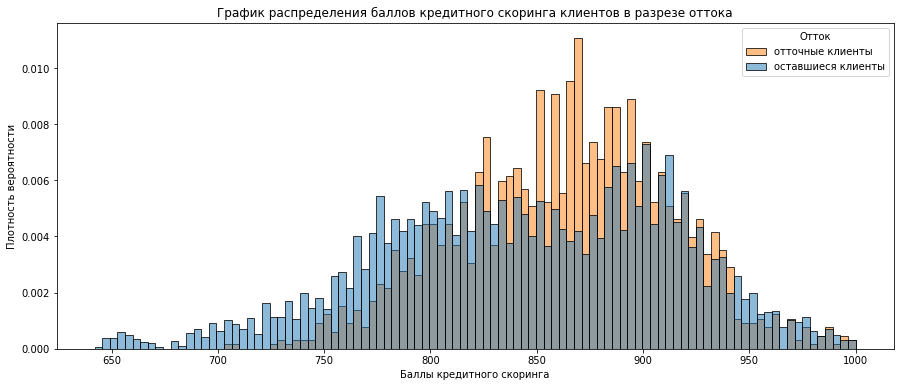

In [29]:
plt.figure(figsize=(15, 6))
sns.histplot(data=data, x='score', hue='churn', fill=True, stat='density', common_norm=False, bins=100)

plt.title('График распределения баллов кредитного скоринга клиентов в разрезе оттока')
plt.xlabel('Баллы кредитного скоринга')
plt.ylabel('Плотность вероятности')
plt.legend(title='Отток', labels=['отточные клиенты', 'оставшиеся клиенты'])
plt.show()

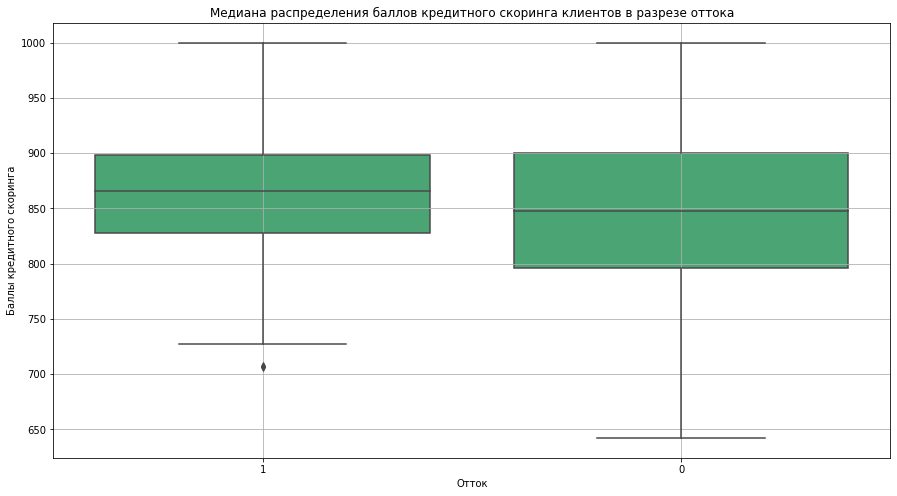

In [30]:
# Создание сводной таблицы с медианами
score_medians = data.groupby('churn')['score'].median().sort_values(ascending=False)

# Построение графика с учетом сортировки по медиане
plt.figure(figsize=(15, 8))
ax = sns.boxplot(x='churn', y='score', data=data, color='#3CB371', order=score_medians.index)
plt.title('Медиана распределения баллов кредитного скоринга клиентов в разрезе оттока')
plt.xlabel('Отток')
plt.ylabel('Баллы кредитного скоринга')
plt.grid(True)
plt.show()

Медиана по оттоку в районе 870 баллов. Отточный промежуток: от 830 до 900 баллов

У отточных клиентов диапазон оценок кредитного скоринга меньше чем у остающихся, но медиана несколько больше: ~ 870 против 850 у остающихся пользователей. 

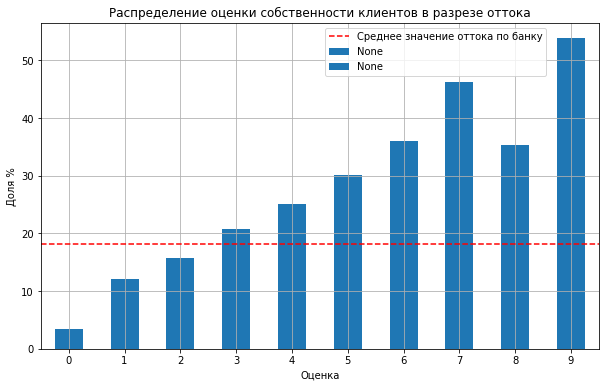

In [31]:
# Диаграмма для оценки собственности в разрезе оттока
equity_churn_counts = data.groupby(['equity', 'churn']).size().unstack()
equity_churn_percentages = equity_churn_counts[1] / (equity_churn_counts[0] + equity_churn_counts[1]) *100
equity_churn_percentages.plot(kind='bar', stacked=True)
plt.axhline(mean_churn, color='r', linestyle='--', label='Среднее значение оттока по банку')
plt.legend(bbox_to_anchor=(0.5, 1), loc='upper left')

equity_churn_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Распределение оценки собственности клиентов в разрезе оттока')
plt.xlabel('Оценка')
plt.ylabel('Доля %')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(bbox_to_anchor=(0.5, 1), loc='upper left')
plt.show()

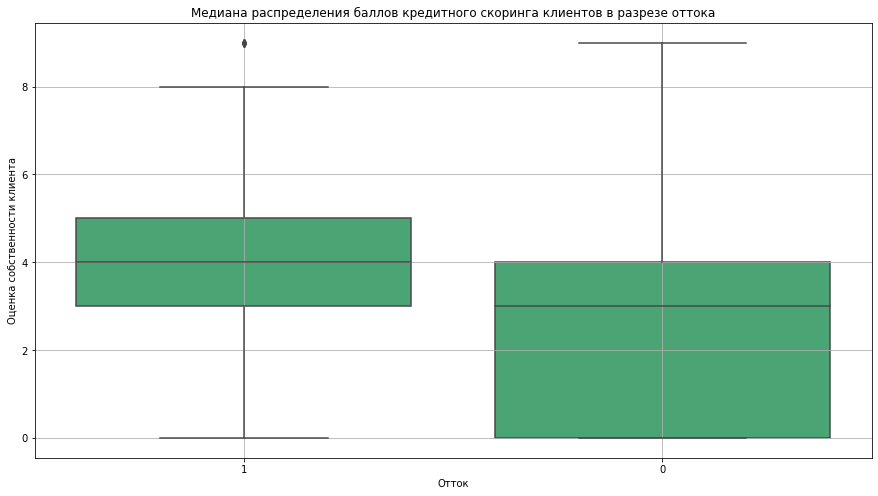

In [32]:
# Создание сводной таблицы с медианами
equity_medians = data.groupby('churn')['equity'].median().sort_values(ascending=False)

# Построение графика с учетом сортировки по медиане
plt.figure(figsize=(15, 8))
ax = sns.boxplot(x='churn', y='equity', data=data, color='#3CB371', order=equity_medians.index)
plt.title('Медиана распределения баллов кредитного скоринга клиентов в разрезе оттока')
plt.xlabel('Отток')
plt.ylabel('Оценка собственности клиента')
plt.grid(True)
plt.show()

Медиана по оттоку в районе 4 баллов. Отточный промежуток: от 3 до 5 баллов

Чем выше оценка собственности, тем больше клиентов в оттоке. Начиная с оценки 3 количество отточных клиентов превышает средний отток по банку

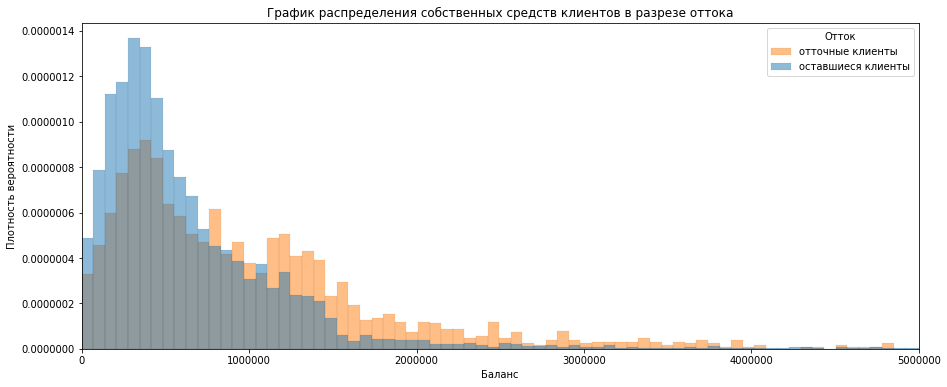

In [33]:
plt.figure(figsize=(15, 6))
sns.histplot(data=data, x='balance', hue='churn', fill=True, stat='density', common_norm=False)
plt.ticklabel_format(style='plain')
plt.xlim(0, 5000000)
plt.title('График распределения собственных средств клиентов в разрезе оттока')
plt.xlabel('Баланс')
plt.ylabel('Плотность вероятности')
plt.legend(title='Отток', labels=['отточные клиенты', 'оставшиеся клиенты'])
plt.show()

Отток начинается у клиентов с балансом около 800 тыс рублей и выше

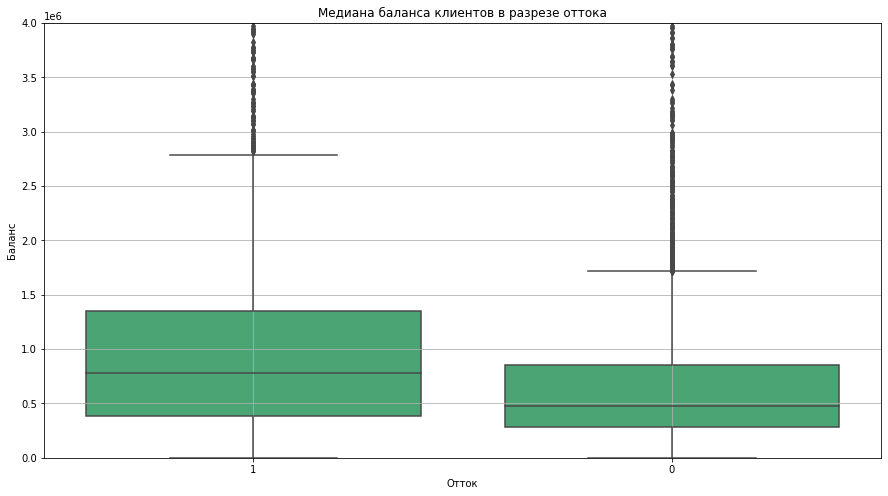

In [34]:
# Создание сводной таблицы с медианами
balance_medians = data.groupby('churn')['balance'].median().sort_values(ascending=False)

# Построение графика с учетом сортировки по медиане
plt.figure(figsize=(15, 8))
ax = sns.boxplot(x='churn', y='balance', data=data, color='#3CB371', order=balance_medians.index)
plt.title('Медиана баланса клиентов в разрезе оттока')
plt.xlabel('Отток')
plt.ylabel('Баланс')
plt.ylim(0, 4000000)
plt.grid(True)
plt.show()

Медиана по оттоку в районе 800 тыс рублей.

У отточных клиентов средств на счетах больше, чем у тех, кто остается в банке. В оттоке медиана находится в районе 800 тыс рублей, у остающихся клиентов - в райлне 500 тыс рублей. 

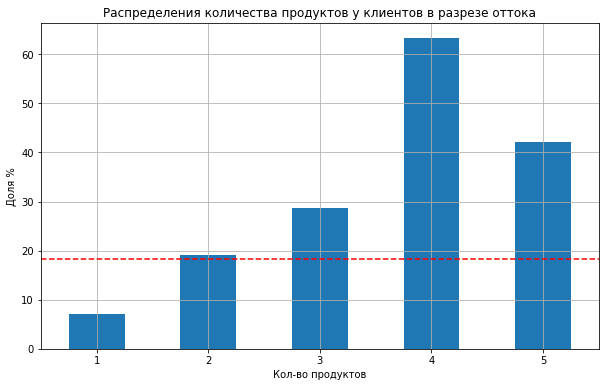

In [35]:
# Диаграмма распределения количества продуктов клиентов в разрезе оттока
products_churn_counts = data.groupby(['products', 'churn']).size().unstack()
products_churn_percentages = products_churn_counts[1] / (products_churn_counts[0] + products_churn_counts[1]) *100
products_churn_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.axhline(mean_churn, color='r', linestyle='--')

plt.title('Распределения количества продуктов у клиентов в разрезе оттока')
plt.xlabel('Кол-во продуктов')
plt.ylabel('Доля %')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

Доля оттока клиентов превышает средний уровень оттока по банку с 2х продуктов и выше

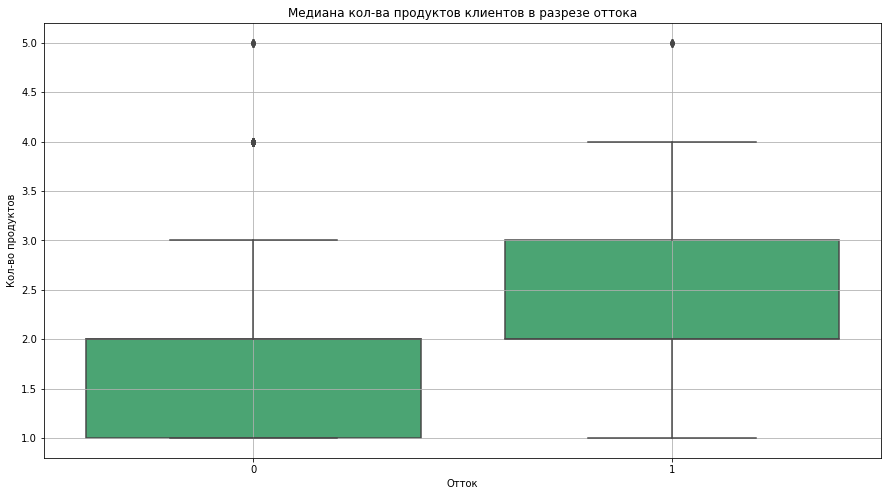

In [36]:
# Создание сводной таблицы с медианами
products_medians = data.groupby('churn')['products'].median().sort_values(ascending=False)

# Построение графика с учетом сортировки по медиане
plt.figure(figsize=(15, 8))
ax = sns.boxplot(x='churn', y='products', data=data, color='#3CB371', order=products_medians.index)
plt.title('Медиана кол-ва продуктов клиентов в разрезе оттока')
plt.xlabel('Отток')
plt.ylabel('Кол-во продуктов')
plt.grid(True)
plt.show()

Медиана по оттоку в районе 2 продуктов. Отточный промежуток: от 2 до 3 продуктов

Как и в графике мы видим, что у отточных клиентов обычно 2-3 продукта. 2 продукта встречается чаще. 5 продуктов в оттоке это уже выброс. У остающихся клиентов количество продуктов меньше. 4 и 5 уже выбросы

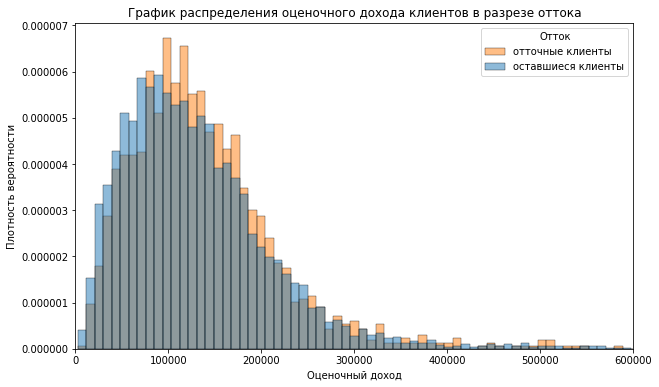

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='est_salary', hue='churn', fill=True, stat='density', common_norm=False)
plt.ticklabel_format(style='plain')
plt.xlim(0, 600000)
plt.title('График распределения оценочного дохода клиентов в разрезе оттока')
plt.xlabel('Оценочный доход')
plt.ylabel('Плотность вероятности')
plt.legend(title='Отток', labels=['отточные клиенты', 'оставшиеся клиенты'])
plt.show()

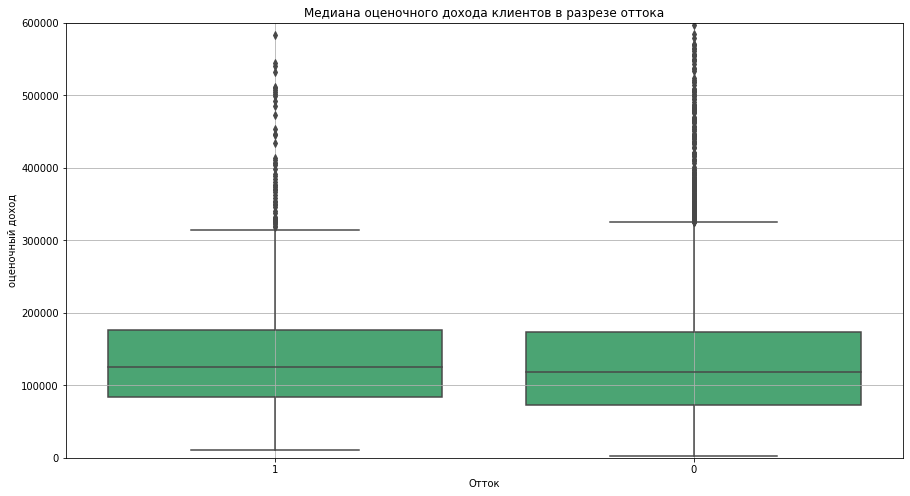

In [38]:
# Создание сводной таблицы с медианами
est_salary_medians = data.groupby('churn')['est_salary'].median().sort_values(ascending=False)

# Построение графика с учетом сортировки по медиане
plt.figure(figsize=(15, 8))
ax = sns.boxplot(x='churn', y='est_salary', data=data, color='#3CB371', order=est_salary_medians.index)
plt.title('Медиана оценочного дохода клиентов в разрезе оттока')
plt.xlabel('Отток')
plt.ylabel('оценочный доход')
plt.ylim(0, 600000)
plt.grid(True)
plt.show()

Медиана по оттоку в районе 130 тыс рублей. Отточный промежуток: от 80 до 180 тыс рублей

нельзя однозначно сказать различается ли доход отточных и остающихся клиентов. Данный вопрос будет рассмотрен рассчете статистических гипотез. В данный момент основной отток идет среди клиентов с доходом от 80 до 180 тыс рублей. Медианное значение в районе 120 тыс

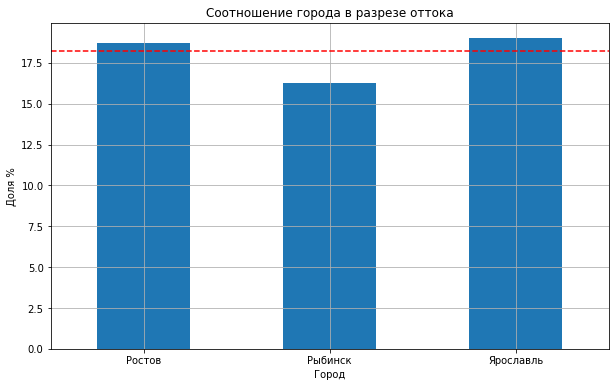

In [39]:
# Диаграмма для города в разрезе оттока
city_churn_counts = data.groupby(['city', 'churn']).size().unstack()
city_churn_percentages = city_churn_counts[1] / (city_churn_counts[0] + city_churn_counts[1]) *100
plt.axhline(mean_churn, color='r', linestyle='--')

city_churn_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Соотношение города в разрезе оттока')
plt.xlabel('Город')
plt.ylabel('Доля %')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

В Рыбинске отток меньше чем в Ярославле или Ростове. Возможно, это связано с тем, что Рыбинск мальнький город и там нет такой конкуренции среди банков, как в городах крупнее

уровень оттока в Ярославле и в Ростове превышают средний уровень оттока по банку. В Ярославле доля оттока самая высокая

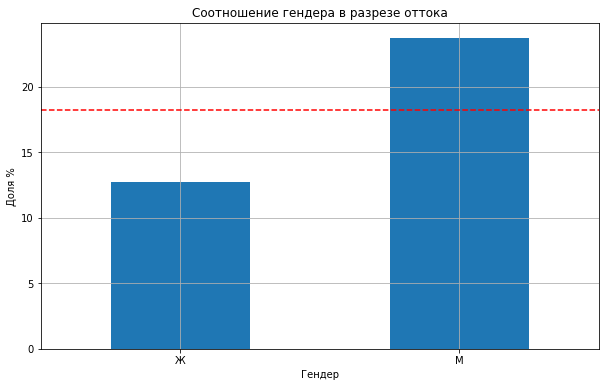

In [40]:
# Диаграмма для гендера в разрезе оттока
gender_churn_counts = data.groupby(['gender', 'churn']).size().unstack()
gender_churn_percentages = gender_churn_counts[1] / (gender_churn_counts[0] + gender_churn_counts[1]) * 100
plt.axhline(mean_churn, color='r', linestyle='--')

gender_churn_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Соотношение гендера в разрезе оттока')
plt.xlabel('Гендер')
plt.ylabel('Доля %')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

Среди мужчин доля оттока составляет около 24 %, у женщин доля оттока меньше: 13%. Так же доля оттока у мужчин превышает уровень среднего оттока по банку

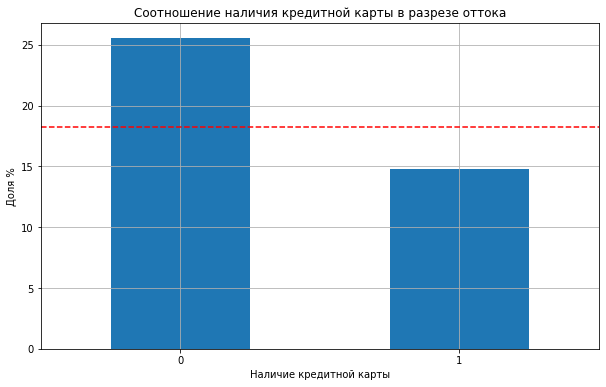

In [41]:
# Диаграмма для наличия кредитной карты в разрезе оттока
credit_card_churn_counts = data.groupby(['credit_card', 'churn']).size().unstack()
credit_card_churn_percentages = credit_card_churn_counts[1] / (credit_card_churn_counts[0] + credit_card_churn_counts[1])*100
plt.axhline(mean_churn, color='r', linestyle='--')

credit_card_churn_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Соотношение наличия кредитной карты в разрезе оттока')
plt.xlabel('Наличие кредитной карты')
plt.ylabel('Доля %')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

Доля оттока среди клиентов у которых нет кредитной карты составляет 26%, в то время как отток клиентов с кредитной картой 14%. Так же доля оттока у клиентов без кредитных карт выше средней по банку

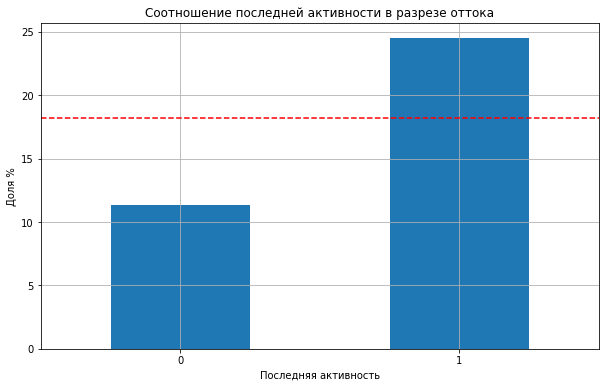

In [42]:
# Диаграмма для последней активности в разрезе оттока
last_activity_churn_counts = data.groupby(['last_activity', 'churn']).size().unstack()
last_activity_churn_percentages = last_activity_churn_counts[1] / (last_activity_churn_counts[0] + last_activity_churn_counts[1])*100
plt.axhline(mean_churn, color='r', linestyle='--')

last_activity_churn_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Соотношение последней активности в разрезе оттока')
plt.xlabel('Последняя активность')
plt.ylabel('Доля %')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

Доля оттока клиентов, у которых была активность составляет 24%, у клиентов без активности доля оттока 12%. Отточность активных клиентов выше средней по банку. Возможно на это  влияет качество обслуживания по телефону или в банке оффлайн

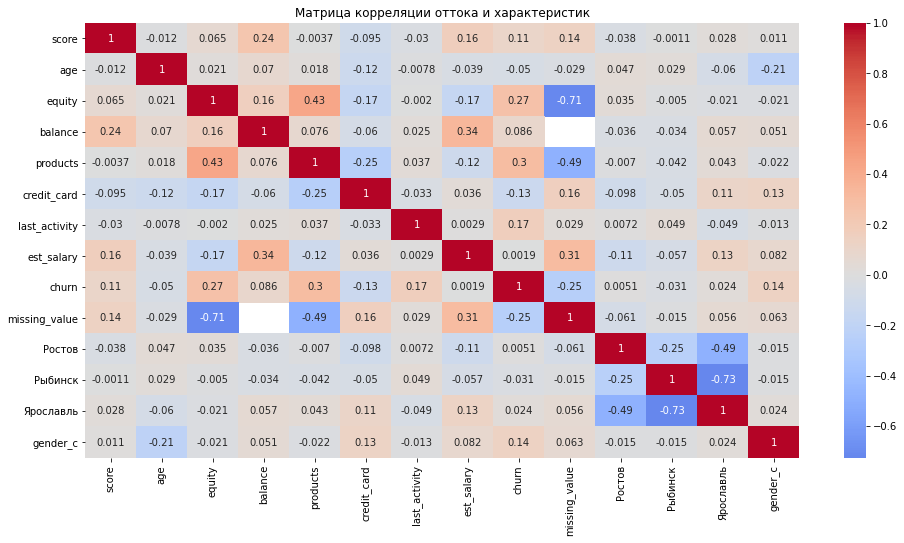

In [43]:
# Визуализируем матрицу корреляции оттока с помощью тепловой карты
correlation_matrix = data.corr()

plt.figure(figsize=(16,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляции оттока и характеристик')
plt.show()

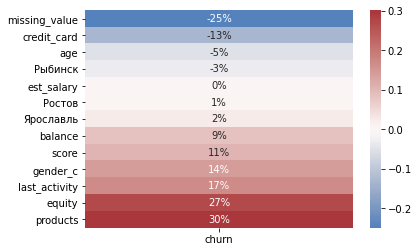

In [44]:
sns.heatmap(
    correlation_matrix.loc[:,['churn']].drop('churn').sort_values('churn'), annot=True, fmt=".0%", cmap='vlag', center=0);

каждый элемент показывает коэффициент корреляции Пирсона между оттоком и соответствующими характеристиками. Значения, близкие к 1 или -1, указывают на сильную положительную или отрицательную связь между оттоком и характеристикой, соответственно. Значения близкие к 0 указывают на отсутствие связи.


В разрезе оттока наблюдается небольшая корреляция:
- с баллами кредитного скоринга (score), 
- с приблизительной оценкой собственности клиента,
- с количеством продуктов,
- и с последней активности

In [45]:
data.pivot_table(index='churn',
                 aggfunc={'score': 'mean',
                          'equity': 'median',
                          'age': 'median',
                          'balance': ['median', 'mean'],
                          'est_salary': 'mean',
                          'products': 'median',
                          'credit_card': lambda x: x.mode(),
                          'city': lambda x: x.mode(),
                          'gender': lambda x: x.mode(),
                          'last_activity': lambda x: x.mode()})

age       balance                  city credit_card equity  \
      median          mean     median   <lambda>    <lambda> median   
churn                                                                 
0         40  7.330316e+05  475410.09  Ярославль           1      3   
1         39  1.134458e+06  783908.90  Ярославль           1      4   

          est_salary   gender last_activity products       score  
                mean <lambda>      <lambda>   median        mean  
churn                                                             
0      147674.637881        Ж             0        2  845.396199  
1      148357.483157        М             1        2  863.361936

в ходе исследования были выявлены портреты отточного клиента и клиента, остающегося в банке.

отточный клиент:
- мужчина в возрасте 39 лет
- проживающий в Ярославле
- с балансом  в районе 800 тыс рублей
- доходом в районе 150 тыс рублей
- с2мя продуктами, часто один из них это кредитная карта
- приблизительная оценка собственности 4 балла
- была активность в последнее время
- скоринговый рейтинг около 850 баллов

остающийся клиент:
- женщина в возрасте 40 лет
- проживающая в Ярославле
- с балансом  в районе 500 тыс рублей
- доходом в районе 150 тыс рублей
- с2мя продуктами, часто один из них это кредитная карта
- приблизительная оценка собственности 3 балла
- не было активности в последнее время
- скоринговый рейтинг около 850 баллов

Удивительно что портреты остающихся и уходящих клиентов так похожи между собой, различаются в основном по гендеру и балансу. Возможно, женщины Ярославля больше любят стабильность)

<div>
    <h3> 3. Проверка статистических гипотез <a class="tocSkip"> </h3>

При выборе меджу t-тестом и u-тестом нужно ориентироваться на распределение данных. В случае, если данные распределены нормально, исследуются 2 независимые группы, то необходимо выбрать t-тест. При тех же условиях, но с распределением, отличным от нормального выбирается u-тест

<div>
    <h3> проверка 1й гипотезы <a class="tocSkip"> </h3>
        
- Н0 = доход у текущих и отточных клиентов банка не различается
- Н1 = доход у текущих и отточных клиентов банка различается

In [46]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

sample_1 = data[data['churn']== 0]['est_salary']
sample_2 = data[data['churn']== 1]['est_salary']

t_results = st.ttest_ind(sample_1, sample_2)

print('t-тест:')
print('p-значение:', t_results.pvalue)

if t_results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print()
    
u_results = st.mannwhitneyu(sample_1, sample_2)

print('u-тест:')
print('p-значение: ', u_results.pvalue)

if u_results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу'
    ) 

t-тест:
p-значение: 0.8500882387258035
Не получилось отвергнуть нулевую гипотезу

u-тест:
p-значение:  0.00016830729188229058
Отвергаем нулевую гипотезу


В данном исследовании корректнее было выбрать тест Манна-Уитни, потому что в данных о доходе есть выбросы, и распределение не будет нормальным. По итогам проверки гипотезы получается, что доход у отточных и остающихся клиентов все же различается.

<div>
    <h3> проверка 2й гипотезы <a class="tocSkip"> </h3>
        
- Н0 = возраст у текущих и отточных клиентов банка не различается
- Н1 = возраст у текущих и отточных клиентов банка различается

In [47]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

sample_1 = data[data['churn']== 0]['age']
sample_2 = data[data['churn']== 1]['age']

t_results = st.ttest_ind(sample_1, sample_2)

print('t-тест:')
print('p-значение:', t_results.pvalue)

if t_results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print()
    
u_results = st.mannwhitneyu(sample_1, sample_2)  

print('u-тест:')
print('p-значение: ', u_results.pvalue)

if u_results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу'
    ) 

t-тест:
p-значение: 4.606448303493975e-07
Отвергаем нулевую гипотезу

u-тест:
p-значение:  3.811912767980522e-06
Отвергаем нулевую гипотезу


Возраст клиентов среди отточных и стающихся отличается

<div>
    <h3> проверка 3й гипотезы <a class="tocSkip"> </h3>
        
- Н0 = количество продуктов у текущих и отточных клиентов банка не различается
- Н1 = количество продуктов у текущих и отточных клиентов банка различается

In [48]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

sample_1 = data[data['churn']== 0]['products']
sample_2 = data[data['churn']== 1]['products']

t_results = st.ttest_ind(sample_1, sample_2)

print('t-тест:')
print('p-значение:', t_results.pvalue)

if t_results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print()
    
u_results = st.mannwhitneyu(sample_1, sample_2)   

print('u-тест:')
print('p-значение: ', u_results.pvalue)

if u_results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу'
    ) 

t-тест:
p-значение: 2.5178746542447946e-208
Отвергаем нулевую гипотезу

u-тест:
p-значение:  1.1812726611971905e-161
Отвергаем нулевую гипотезу


<div>
    <h5>Итоги проведенных тестов:<a class="tocSkip"> </h5>

1. Гипотеза. По итогам проверки 2мя методами выявлено, что доход уходящих клиентов отличается от дохода остающихся в большую сторону.

2. Гипотеза. По итогам проверки выявлено, что возраст у отточных и остающихся клиентов различется. Что и было ранее подтверждено графиками.

3. Гипотеза. Выявила, что количество продуктов у отточных клиентов и остающих так же различаются. 

Во всех вышеописанных случаях, нулевая гипотеза была отвергнута.

<div>
    <h3> 4. Промежуточный итог <a class="tocSkip"> </h3>

- Медиана возраста оттока в районе 39-40 лет.
- Отточных клиентов я бы поделила на 3 возрастные группы: 24-37 (здесь уровень оттока выше чем количество остающихся у банка клиентов, и идет на повышение), 38-46 (количество отточных клиентов меньше чем оставшихся и график идет на понижение) лет и 47-62 (очередной всплеск оттока)
- Чем выше оценка собственности, тем больше клиентов в оттоке. Начиная с оценки 3 количество отточных клиентов превышает количество остающихся в этой категории
- У отточных клиентов средств на счетах больше, чем у тех, кто остается в банке. В оттоке медиана находится в районе 800 тыс рублей, у остающихся клиентов - в районе 500 тыс рублей. 
- чем больше кол-во продуктов, тем больше количество уходящих клиентов
- Люди, с оценочным доходом выше 80 тыс чаще уходят из банка. Эта тенденция наблюдается в течение всего графика
- В Рыбинске отток меньше чем в Ярославле или Ростове. Возможно, это связано с тем, что Рыбинск мальнький город и там нет такой конкуренции среди банков, как в городах крупнее
- Среди мужчин процент оттока больше в 2 раза относительно женщин
- Отточных клиентов с кредитной картой меньше чем тех, у кого данный продукт отсутствует
- уходит много людей, которые имели активность в последнее время. Возможно на это дополнительно влияет качество обслуживания по телефону или в банке оффлайн

<div>
    <h3> 5. Сегментация на основе стратегических показателей <a class="tocSkip"> </h3>

In [49]:
data_segment_1 = data.query(
    'products >= 2 & products <= 3 & credit_card == 0 & gender_c == 1 & equity >= 4')
churn_percentage_1 = len(data_segment_1[data_segment_1['churn'] == 1])/len(data_segment_1)*100

print('Размер сегмента:', data_segment_1.shape[0])
print(f"Уровень оттока: {churn_percentage_1:.2f}%")

Размер сегмента: 616
Уровень оттока: 50.16%


Характеристики 1-го сегмента:

- мужчины
- с 2-3 банковскими продуктами
- без кредитной карты
- с приблизительной оценкой собственности более 4 единиц

In [50]:
data_segment_2 = data.query(
    'last_activity == 1 & credit_card == 0 & balance < 1500000 & score > 850')
churn_percentage_2 = len(data_segment_2[data_segment_2['churn'] == 1])/len(data_segment_2)*100

print('Размер сегмента:', data_segment_2.shape[0])
print(f"Уровень оттока: {churn_percentage_2:.2f}%")

Размер сегмента: 547
Уровень оттока: 58.50%


Характеристики 2-го сегмента:

- клиенты, у которых была зафиксирована активность 
- с балансом менее 1,5 млн
- без кредитной карты
- скоринговый рейтинг больше 830 баллов

In [51]:
data_segment_3 = data.query(
    'balance > 1500000 & equity >= 4')
churn_percentage_3 = len(data_segment_3[data_segment_3['churn'] == 1])/len(data_segment_3)*100

print('Размер сегмента:', data_segment_3.shape[0])
print(f"Уровень оттока: {churn_percentage_3:.2f}%")

Размер сегмента: 583
Уровень оттока: 50.43%


Характеристики 3-го сегмента:

- клиенты с балансом более 1,5 млн
- с приблизительной оценкой собственности более 4 единиц

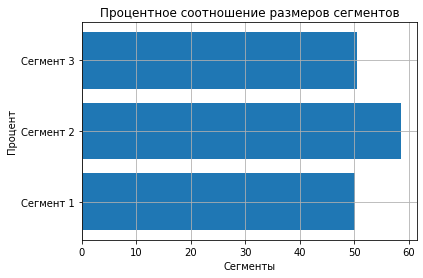

In [52]:
#Приоритизация
segments = ['Сегмент 1', 'Сегмент 2', 'Сегмент 3']
sizes = [churn_percentage_1, churn_percentage_2, churn_percentage_3]

plt.barh(segments, sizes)
plt.title('Процентное соотношение размеров сегментов')
plt.xlabel('Сегменты')
plt.ylabel('Процент')
plt.grid(True)
plt.show()

<div>
    <h3> 6. Выводы и рекомендации для заказчика <a class="tocSkip"> </h3>

В ходе исследований были выделены 3 сегмента уходящих пользователей:

1 сегмент (мужчины, с 2-3 банковскими продуктами, без кредитной карты. Размер сегмента: 616.Уровень оттока: 50.16%. По приоритету третий). Рекомендации:
- предложите оформление кредитной карты на выгодных условиях,
- подарочные бонусы или кэшбэк на покупки товаров для мужчин,
- уточните, какие породукты оформлены, есть ли среди них страхование жизни, средств на карте и т.д. При отсутсвии предложите оформить данный продукт
- предложите страхование объектов собственности на выходных условиях, например скидку на страховку на 2 и более квартир, или скидка на расширенную страховку


2 сегмент (была активность в последнее время, баланс клиента менее 1,5 млн рублей, нет кредитной карты. Размер сегмента: 547.
Уровень оттока: 58.50%. По приоритету первый). Рекомендации:
- предложите оформление кредитной карты на выгодных условиях,
- стимулируйте клиента к увеличению средств на счете, предложив бонусы или инвестиционные возможности
- улучшайте качество обслуживания клиентов по телефону и в оффлайн-офисах. Необходимо найти проблемные области и предпринять меры для улучшения качества обслуживания, чтобы удержать клиентов и предотвратить отток.


3 сегмент (баланс более 1,5 млн, оценка собственности выше 4 баллов. Размер сегмента: 583. Уровень оттока: 50.43%. По приоритету второй). Рекомендации:
- сделайте персональные предложения по вкладам для этой категории клиентов
- возможно для этой категории лиц можно организовать более высокий уровень обслуживания, например персональный менеджер, банковская карта с повышенным кешбэком
- предложите страхование объектов собственности на выходных условиях, например скидку на страховку на 2 и более квартир, или скидка на расширенную страховку
- предложите персональные условия для кредитования


При сравнении портреов типичного и отточного клиентов выявлено, что при практически равных условиях мужчины уходят из банка чаще чем женщины. Возможно нужно разработать гендерные предложения и акции для укрепления уверенности в правильном выборе банка текущими пользователями и удержания тех, кто желает уйти.